# Problem definition
Cluster countries based GDP

In [35]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')

## Load the data

In [36]:
#1.1 import data set
df = pd.read_csv('/Users/jacobjablonski/Documents/Education/Concordia/Big Data Diploma/CEBD 1260/Final Project/Data/Processed/train.csv')
df = df.set_index(['CountryName'])
df.head()


,Unnamed: 0,Year,Life_expectancy_zscore,CO2_Emmissions_capita_zscore,Fertility_rate_zscore,Merchandise_export_zscore,GDP_zscore
CountryName,,,,,,,
Timor-Leste,4822573,2009,0.187057,NaN,NaN,NaN,NaN
Togo,4823292,2009,-0.589603,NaN,NaN,NaN,NaN
Tonga,4824106,2009,0.776267,NaN,NaN,NaN,NaN
Trinidad and Tobago,4824840,2009,0.561542,NaN,NaN,NaN,NaN
Tunisia,4825592,2009,0.990840,NaN,NaN,NaN,NaN


# Feauture Engineering

In [51]:
df_clean = df[['Life_expectancy_zscore', 'CO2_Emmissions_capita_zscore', 'Fertility_rate_zscore', 'Merchandise_export_zscore', 'GDP_zscore']] = df[['Life_expectancy_zscore', 'CO2_Emmissions_capita_zscore', 'Fertility_rate_zscore', 'Merchandise_export_zscore', 'GDP_zscore']].fillna(value=0)

In [54]:
# remove column
X_columns = list(df_clean.columns)
if 'Unnamed: 0' in X_columns:
    X_columns.remove('Unnamed: 0')
df_clean = df_clean[X_columns]

# normalize the columns
df_norm = df_clean.copy()
for col in X_columns:
    df_norm[col] = StandardScaler().fit_transform(df_norm[col].values.reshape(-1, 1))

print(df.shape)
df_norm.head()

(45407, 5)


,Life_expectancy_zscore,CO2_Emmissions_capita_zscore,Fertility_rate_zscore,Merchandise_export_zscore,GDP_zscore
CountryName,,,,,
Timor-Leste,1.204141,-7.695605e-16,1.888354e-15,8.551849e-17,1.468871e-16
Togo,-4.191410,-7.695605e-16,1.888354e-15,8.551849e-17,1.468871e-16
Tonga,5.297452,-7.695605e-16,1.888354e-15,8.551849e-17,1.468871e-16
Trinidad and Tobago,3.805735,-7.695605e-16,1.888354e-15,8.551849e-17,1.468871e-16
Tunisia,6.788118,-7.695605e-16,1.888354e-15,8.551849e-17,1.468871e-16


In [55]:
k = 7
kmeans = KMeans(n_clusters=k).fit(df_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

df_results = df_clean.copy()
df_norm['cluster'] = kmeans.labels_
df_results['cluster'] = kmeans.labels_

{0, 1, 2, 3, 4, 5, 6}
Counter({0: 33991, 5: 5196, 3: 4288, 6: 742, 1: 597, 4: 450, 2: 143})


[('Small states', 205), ('Gabon', 202), ('Fiji', 198), ('Kiribati', 197), ('Philippines', 197)]
[('Tonga', 5), ('Tunisia', 5), ('Turkey', 5), ('United Arab Emirates', 5), ('United Kingdom', 5)]
[('World', 25), ('High income', 21), ('High income: OECD', 20), ('OECD members', 20), ('Europe & Central Asia (all income levels)', 12)]
[('Angola', 54), ('Burkina Faso', 54), ('Burundi', 54), ('Chad', 54), ('Congo, Dem. Rep.', 54)]
[('Luxembourg', 52), ('Qatar', 49), ('United States', 48), ('North America', 47), ('United Arab Emirates', 41)]
[('Central Europe and the Baltics', 54), ('Euro area', 54), ('Europe & Central Asia (all income levels)', 54), ('European Union', 54), ('High income', 54)]
[('Monaco', 37), ('United Arab Emirates', 36), ('Switzerland', 28), ('Liechtenstein', 27), ('Luxembourg', 27)]
Life_expectancy_zscore


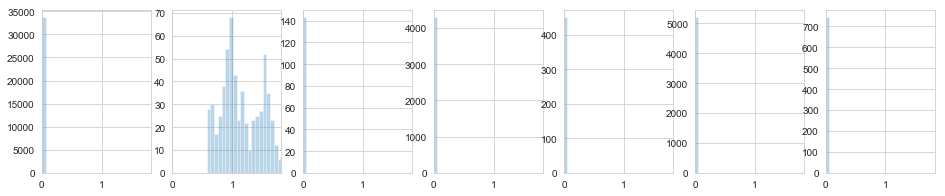

CO2_Emmissions_capita_zscore


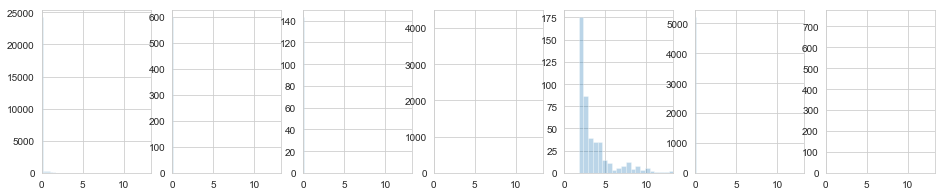

Fertility_rate_zscore


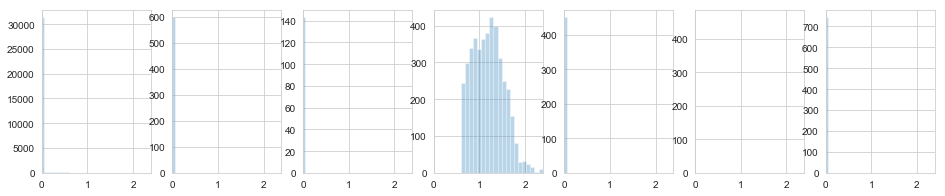

Merchandise_export_zscore


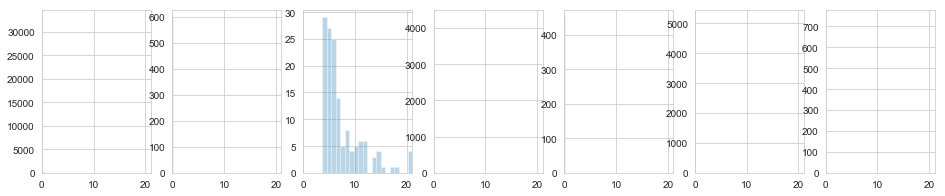

GDP_zscore


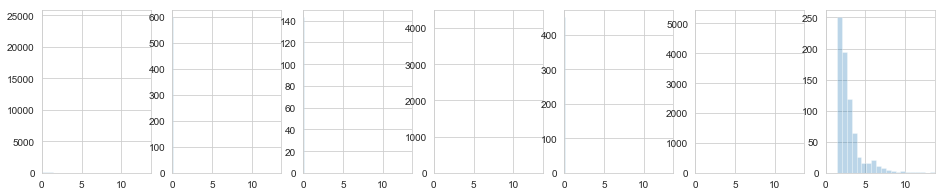

In [57]:
# Analyze the results
df_results = df_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(df_results[df_results['cluster']==cluster]['CountryName']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [58]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3,4,5,6
index,24248.41,478.17,33050.33,15741.37,6771.53,19087.36,43007.76
Life_expectancy_zscore,-0.00,1.14,0.00,0.00,0.00,0.00,0.00
CO2_Emmissions_capita_zscore,-0.05,0.00,0.00,0.00,3.49,0.00,0.00
Fertility_rate_zscore,0.00,0.00,0.00,1.18,0.00,-1.00,0.00
Merchandise_export_zscore,-0.03,0.00,7.38,0.00,0.00,0.00,0.00
GDP_zscore,-0.06,0.00,0.00,0.00,0.00,0.00,2.89


Life_expectancy_zscore


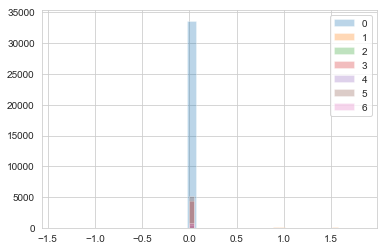

CO2_Emmissions_capita_zscore


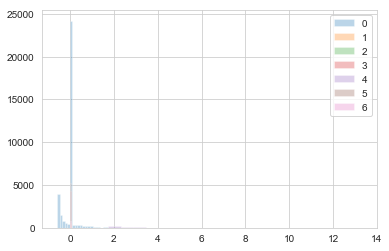

Fertility_rate_zscore


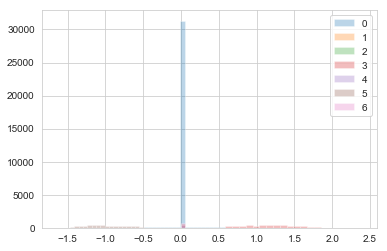

Merchandise_export_zscore


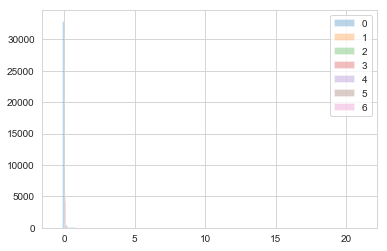

GDP_zscore


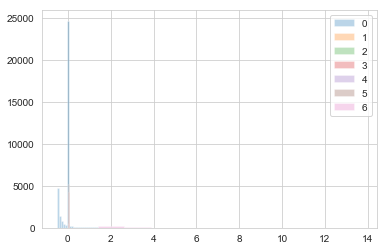

In [59]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

In [60]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(df_norm[df_norm['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 1.9475218809207981
Intra Cluster distance 0.05855854883483921
Inertia 65469.30144081854


In [ ]:
inertia = []
number_k = []
for k in range(2, 100, 10):
    kmeans = KMeans(n_clusters=k).fit(df_norm.values)
    inertia.append(kmeans.inertia_)
    number_k.append(k)
plt.plot(number_k, inertia)
plt.show()